<a href="https://colab.research.google.com/github/LuisOtilioZuniga/Programaci-n-para-anal-tica-descriptiva-y-predictiva/blob/main/Pr%C3%A1cticaRegresionDatosCategoricos%2C_263349.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NOMBRE:** LUIS OTILIO ZÚÑIGA PRÓSPERO
**MATRICULA:** 263349

# **Práctica 25: Regresión con Datos Categóricos**

** Regresión lineal con datos categóricos: Costos, Localidades y Salarios**

📌 Objetivos de la Práctica:
Al finalizar esta práctica, los estudiantes serán capaces de:

- Codificar variables categóricas usando one-hot encoding con K-1 para problemas de regresión
- Realizar AED
- Construir un modelo de regresión con variables dummy
- Interpretar los resultados de los coeficientes
- Analizar los resultados de los errores residuales
- Calcular el desempeño del modelo de regresión.

Problema: Se podría argumentar que el salario está relacionado con el costo de la educación. Por lo tanto, para analizar este argumentos veremos qué sucede cuando usamos las variables independientes cost y location.

# 1. Carga de datos

Carga el conjunto de datos college.csv, que está en campus virtual, en un dataframe. Elige de este conjunto las columnas salary (variable dependiente), cost(variable independiente - numérica) y location (variable independiente categórica).

Realiza lo siguiente:

*   Convierte si es necesario la variable location a tipo de dato categórico
*   Usa la instrucción describe() en las variables salary y cost
* Cuenta la cantidad de datos que hay por categoría en location
* Convierte la variable location usando one-hot encoding



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Primeras filas del dataset:
   id                                         name  salary    cost   public  \
0   1  Massachusetts Institute of Technology (MIT)  119000  189300  Private   
1   2                           Harvard University  121000  189600  Private   
2   3                            Dartmouth College  123000  188400  Private   
3   4                         Princeton University  123000  188700  Private   
4   5                              Yale University  110000  194200  Private   

  location  
0       NE  
1       NE  
2       NE  
3       NE  
4       NE  

Tipos de datos iniciales:
salary       int64
cost         int64
location    object
dtype: object

Tipos de datos después de conversión:
salary         int64
cost           int64
location    category
dtype: object

Estadísticas descriptivas de salary y cost:
              salary           

/tmp/ipython-input-3261971455.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='location', data=df, palette=blue_palette)
/tmp/ipython-input-3261971455.py:57: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.countplot(x='location', data=df, palette=blue_palette)


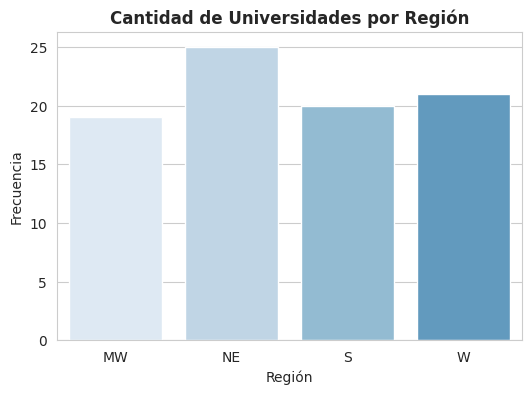

In [10]:

#Bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Paleta de colores, tonos azules
# Esta paleta se utilizará en todos los gráficos de la práctica
blue_palette = sns.color_palette("Blues", n_colors=6)
sns.set_palette(blue_palette)
sns.set_style("whitegrid")

# Carga el conjunto de datos college.csv y verifica que su carga sea correcta.
from google.colab import drive
drive.mount('/content/drive')

#Leemos el CSV college.csv
df = pd.read_csv('drive/MyDrive/Colab Notebooks/Programación para analítica descriptiva y predictiva/SEMANA 11/college.csv')

# Mostramos las primeras filas del dataframe para verificar que se haya cargado correctamente
print("Primeras filas del dataset:")
print(df.head(5))

# PUNTO 1.

# Nos quedamos con las columnas relevantes: salary, cost y location
df = df[['salary', 'cost', 'location']]

# Verificamos los tipos de datos y convertimos 'location' a categórica si es necesario
print("\nTipos de datos iniciales:")
print(df.dtypes)

# Si 'location' no está en formato categórico, la convertimos
df['location'] = df['location'].astype('category')

print("\nTipos de datos después de conversión:")
print(df.dtypes)

# Estadísticas descriptivas de las variables numéricas
# describe() nos ayuda a obtener información básica sobre las variables numéricas
print("\nEstadísticas descriptivas de salary y cost:")
print(df[['salary', 'cost']].describe())

# Conteo de datos por categoría en 'location'
print("\nCantidad de datos por ubicación (location):")
print(df['location'].value_counts())

# Aplicación de One-Hot Encoding a la variable categórica 'location'
# Se utiliza drop_first=True para aplicar el método K-1 (evita multicolinealidad)
df_encoded = pd.get_dummies(df, columns=['location'], drop_first=True)

print("\nPrimeras filas después del One-Hot Encoding:")
print(df_encoded.head())

# Visualización del conteo de cada categoría en 'location'
plt.figure(figsize=(6,4))
sns.countplot(x='location', data=df, palette=blue_palette)
plt.title('Cantidad de Universidades por Región', fontsize=12, fontweight='bold')
plt.xlabel('Región')
plt.ylabel('Frecuencia')
plt.show()

**OBSERVACIONES PUNTO 1:**
En esta primera parte se cargaron los datos del archivo college.csv y se seleccionaron las columnas necesarias para el análisis: salary, cost y location. Se verificaron los tipos de datos y se convirtió la variable location en categórica para poder trabajarla correctamente dentro del modelo. Posteriormente, se aplicó el método one-hot encoding con la opción K-1 para transformar la variable categórica en variables numéricas sin generar redundancia. También se revisaron las estadísticas descriptivas de salary y cost, y se observó la cantidad de universidades por región mediante un gráfico.

# 2. Análisis Exploratorio de los Datos

Realiza un análisis exploratorio de los datos y discute lo que observas en cada gráfica.


*   Crea un histograma de la columna salary. Discute lo que observas
* Crea un diagrama de dispersión de salary vs cost, considerando lo siguiente: para cada punto elegirás un color que represente la localidad en la que está el salario y el costo de la educación. Por lo tanto el diagrama de dispersión debería tener puntos en 4 colores distintos. Discute lo que observas
* Emplea un boxplot para saber si hay diferencias en los costos según la ubicación, es decir, con boxplot deberás analizar la distribución de cost por localidad. Discute lo que observas




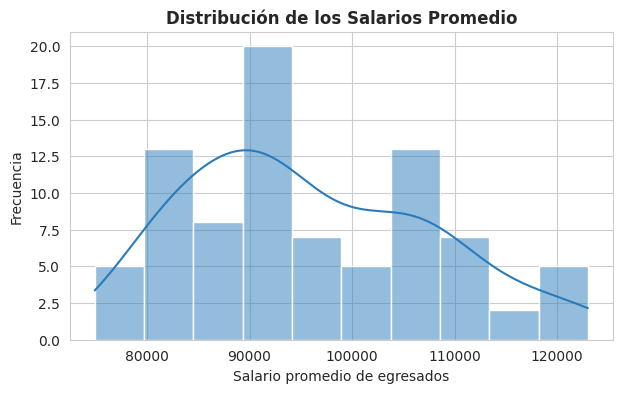

/tmp/ipython-input-2567098759.py:11: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.scatterplot(x='cost', y='salary', hue='location', data=df, palette=blue_palette, s=70)


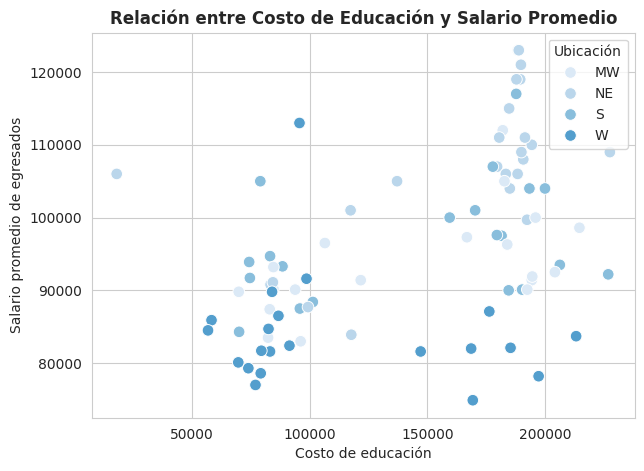

/tmp/ipython-input-2567098759.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='location', y='cost', data=df, palette=blue_palette)
/tmp/ipython-input-2567098759.py:20: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.boxplot(x='location', y='cost', data=df, palette=blue_palette)


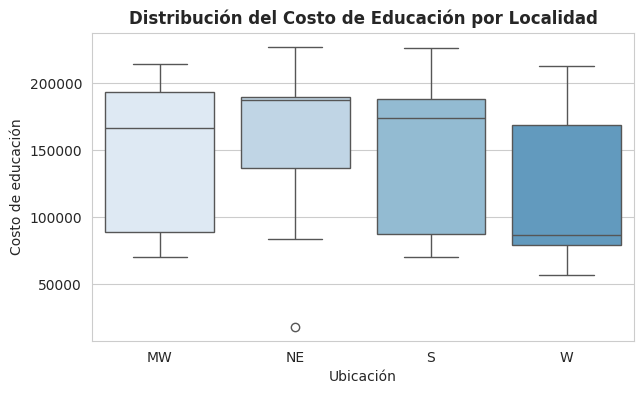

In [11]:
# 1. Histograma de la variable 'salary'
plt.figure(figsize=(7,4))
sns.histplot(df['salary'], bins=10, kde=True, color=blue_palette[4])
plt.title('Distribución de los Salarios Promedio', fontsize=12, fontweight='bold')
plt.xlabel('Salario promedio de egresados')
plt.ylabel('Frecuencia')
plt.show()

# 2. Diagrama de dispersión: salary vs cost, coloreado por location
plt.figure(figsize=(7,5))
sns.scatterplot(x='cost', y='salary', hue='location', data=df, palette=blue_palette, s=70)
plt.title('Relación entre Costo de Educación y Salario Promedio', fontsize=12, fontweight='bold')
plt.xlabel('Costo de educación')
plt.ylabel('Salario promedio de egresados')
plt.legend(title='Ubicación')
plt.show()

# 3. Boxplot del costo por localidad
plt.figure(figsize=(7,4))
sns.boxplot(x='location', y='cost', data=df, palette=blue_palette)
plt.title('Distribución del Costo de Educación por Localidad', fontsize=12, fontweight='bold')
plt.xlabel('Ubicación')
plt.ylabel('Costo de educación')
plt.show()

**OBSERVACIONES PUNTO 2.**
En el histograma de salarios se observa que la mayoría de las universidades tienen salarios promedio concentrados entre los 85,000 y 100,000 dólares, mostrando una distribución algo sesgada hacia la derecha, lo que indica que existen algunas instituciones con salarios más altos pero menos frecuentes.

En el diagrama de dispersión, se aprecia una tendencia positiva entre el costo de la educación y el salario promedio: en general, las universidades con costos más altos tienden a presentar salarios mayores. Además, los colores permiten ver que esta relación puede variar ligeramente entre regiones.

Finalmente, en el boxplot se observa que los costos de educación varían por localidad, aunque las regiones parecen tener medianas cercanas, destacando que la región NE presenta una mayor dispersión en los costos. En conjunto, el análisis sugiere que tanto la ubicación como el costo pueden tener cierta influencia sobre los salarios promedio.

# 3. Construcción del modelo de regresión

- Construye el modelo de regresión usando los datos de salario, costo y location. Recuerda que esta última debe ser en su versión codificada con one-hot encoding.
- Imprime los coeficientes e interpreta qué significan cuando se sustituyen valores en costo, y location (versión codificada). Si no recuerdas cómo se hace esta interpretación consulta los videos.


In [16]:
# Convertimos las variables booleanas a tipo numérico (0 y 1)
df_encoded = df_encoded.astype({'location_NE': int,
                                'location_S': int,
                                'location_W': int})

# Recordemos que el dataframe 'df_encoded' ya contiene las variables:
# salary (dependiente), cost y las variables dummy de location (independientes)

# Definimos la variable dependiente (Y) y las independientes (X)
X = df_encoded.drop(columns='salary')  # Variables independientes
y = df_encoded['salary']               # Variable dependiente

# Agregamos una constante para el término independiente del modelo (β₀)
X = sm.add_constant(X)

# Verificamos tipos de datos
print("Tipos de datos después de convertir a numéricos:\n", X.dtypes)

# Construimos el modelo de regresión lineal
modelo = sm.OLS(y, X).fit()

# Mostramos el resumen del modelo
print(modelo.summary())

# Interpretación de los coeficientes
# Obtenemos los coeficientes de forma más simple
print("\nCoeficientes del modelo:")
print(modelo.params)

Tipos de datos después de convertir a numéricos:
 const          float64
cost             int64
location_NE      int64
location_S       int64
location_W       int64
dtype: object
                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     26.57
Date:                Sat, 25 Oct 2025   Prob (F-statistic):           4.96e-14
Time:                        01:56:29   Log-Likelihood:                -882.12
No. Observations:                  85   AIC:                             1774.
Df Residuals:                      80   BIC:                             1786.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std e

**OBSERVACIONES PUNTO 3:**
En este punto se construyó un modelo de regresión lineal múltiple para analizar cómo el costo y la ubicación influyen en el salario promedio. El modelo explicó alrededor del 57 % de la variación en los salarios, mostrando que el costo tiene un efecto positivo y significativo: a mayor costo educativo, el salario promedio tiende a ser más alto.

Respecto a la ubicación, las universidades del Noreste (NE) presentan salarios notablemente mayores, mientras que en el Oeste (W) tienden a ser más bajos. La región Sur (S) no mostró diferencias significativas. En conjunto, los resultados confirman que tanto el costo como la región influyen de forma importante en los salarios de los egresados.

# 4. Análisis de Residuos

- Construyen una visualización de predicciones (salario estimado) vs valores reales (salario real).
- Crea una gráfica de los errores residuales. Discute lo que observas

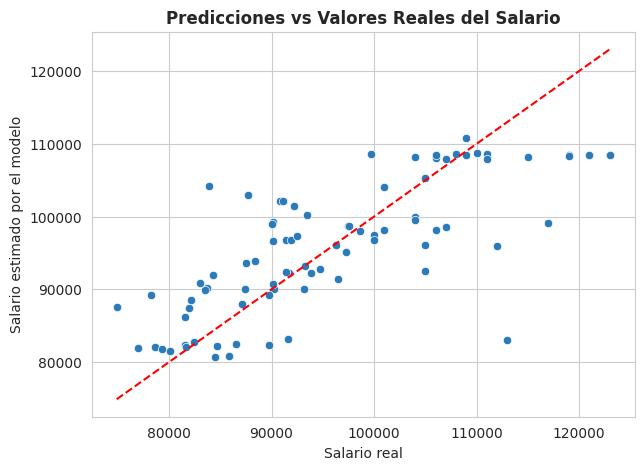

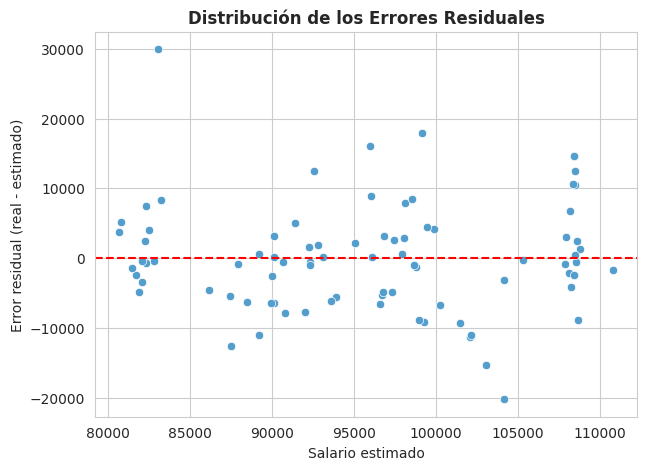

In [17]:
# 1. Predicciones vs valores reales
# Obtenemos las predicciones del modelo
y_pred = modelo.predict(X)

plt.figure(figsize=(7,5))
sns.scatterplot(x=y, y=y_pred, color=blue_palette[4])
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Línea de referencia
plt.title('Predicciones vs Valores Reales del Salario', fontsize=12, fontweight='bold')
plt.xlabel('Salario real')
plt.ylabel('Salario estimado por el modelo')
plt.show()

# 2. Gráfico de residuos
residuos = y - y_pred

plt.figure(figsize=(7,5))
sns.scatterplot(x=y_pred, y=residuos, color=blue_palette[3])
plt.axhline(0, color='r', linestyle='--')  # Línea base de referencia
plt.title('Distribución de los Errores Residuales', fontsize=12, fontweight='bold')
plt.xlabel('Salario estimado')
plt.ylabel('Error residual (real - estimado)')
plt.show()

**OBSERVACIONES PUNTO 4:**
En el gráfico de predicciones vs valores reales, los puntos se agrupan cerca de la línea roja diagonal, lo que muestra que el modelo logra estimar correctamente los salarios para la mayoría de las universidades. Sin embargo, se aprecia cierta dispersión, especialmente en los valores más altos, lo que indica que el modelo tiende a subestimar algunos salarios altos y sobreestimar algunos bajos.

En la gráfica de errores residuales, los puntos se distribuyen alrededor de la línea cero sin un patrón definido, lo que sugiere que los residuos son aleatorios y el modelo no presenta un sesgo sistemático. Aunque existen algunos valores alejados del eje (outliers), en general, los errores se mantienen dentro de un rango razonable, lo que confirma un ajuste adecuado y un desempeño aceptable del modelo.

# 5. Evalúa el modelo

- Calcula el MSE del modelo construido. Recuerda que usas el propio conjunto de datos (No hablamos nada de entrenamiento y test).
- Calcula el R² Score

Discute estos resultados obtenidos.

In [18]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculamos el MSE (Error Cuadrático Medio)
mse = mean_squared_error(y, y_pred)

# Calculamos el R² (coeficiente de determinación)
r2 = r2_score(y, y_pred)

# Mostramos los resultados
print(f"MSE del modelo: {mse:.2f}")
print(f"R² Score del modelo: {r2:.3f}")

MSE del modelo: 60480269.15
R² Score del modelo: 0.571


**OBSERVACIONES PUNTO 5:**
El modelo obtuvo un MSE (Error Cuadrático Medio) de aproximadamente 60480269.15, lo que indica que, en promedio, las predicciones del modelo difieren de los valores reales en esa magnitud al cuadrado. Un valor bajo de MSE significa que las predicciones son bastante cercanas a los valores reales.

El R² Score fue de 0.571, lo que significa que cerca del 57 % de la variación en los salarios puede explicarse a partir del costo y la ubicación de las universidades. En general, esto refleja que el modelo tiene un buen desempeño considerando la simplicidad del análisis, aunque todavía hay un porcentaje de variación que podría explicarse con otras variables no incluidas en el modelo.

# 6. Realiza un análisis de varianza con stastmodel

Consulta esto aquí https://www.statsmodels.org/dev/examples/notebooks/generated/variance_components.html

In [21]:
# PUNTO 6: Análisis de Varianza (ANOVA)
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Creamos nuevamente el modelo usando la fórmula (para que ANOVA funcione)
# Nota: usamos las variables originales (no el df_encoded con la constante)
modelo_formula = ols('salary ~ cost + location', data=df).fit()

# Aplicamos el ANOVA al modelo
anova_results = anova_lm(modelo_formula)

# Mostramos los resultados
print("ANÁLISIS DE VARIANZA (ANOVA):")
print(anova_results)

ANÁLISIS DE VARIANZA (ANOVA):
            df        sum_sq       mean_sq          F        PR(>F)
location   3.0  6.040930e+09  2.013643e+09  31.335738  1.694998e-13
cost       1.0  7.878166e+08  7.878166e+08  12.259774  7.600629e-04
Residual  80.0  5.140823e+09  6.426029e+07        NaN           NaN


**OBSERVACIONES PUNTO 6:**
Con base en los resultados del ANOVA, se observa que tanto la ubicación (location) como el costo (cost) presentan valores de p muy pequeños, menores a 0.05, lo que indica que ambas variables tienen un efecto estadísticamente significativo sobre el salario promedio.

En particular, la variable location muestra un valor de F = 31.33 con una p ≈ 1.69e−13, lo que confirma que existen diferencias importantes entre las regiones en cuanto a los salarios.
Por otro lado, cost tiene un F = 12.26 y una p ≈ 0.00076, evidenciando que el costo de la educación también influye significativamente en el salario.
En conjunto, estos resultados respaldan las conclusiones previas: tanto la ubicación geográfica como el costo educativo son factores relevantes para explicar las variaciones en los salarios promedio de los egresados.